In [10]:
import numpy as np
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
from matplotlib import cm
import proplot as plot
from sklearn.metrics import pairwise_distances
import seaborn as sns

In [2]:
in_wd = '/home/axd497/wgs_ecoli/'
mut_lat = np.loadtxt('{}data/MutationLatentCoordinates.tsv'.format(in_wd), delimiter='\t')
mic_lat = np.loadtxt('{}data/MICLatentCoordinates.tsv'.format(in_wd), delimiter='\t')
mic_mat = np.loadtxt('{}data/MICMat.tsv'.format(in_wd), delimiter='\t')

In [ ]:
# PLS
pls_fit = PLSRegression(n_components=3).fit(mut_lat, mic_mat)
pls_embedd = pls_fit.transform(mut_lat)
pls_pred = pls_fit.predict(mut_lat)

In [12]:
cos_sim=1.0-pairwise_distances(pls_fit.y_loadings_, pls_fit.y_loadings_, metric='cosine')
np.savetxt('{}data/CosineSimilarity.tsv'.format(in_wd), X=cos_sim, delimiter='\t')
#sns.clustermap(cos_sim, cmap='vlag', xaxisticklabels=)

In [3]:
# PLS
pls_fit = PLSRegression(n_components=2).fit(mut_lat, mic_mat)
pls_embedd = pls_fit.transform(mut_lat)
pls_pred = pls_fit.predict(mut_lat)

In [34]:
X, Y = np.meshgrid(np.linspace(-3.0, 3.0, 100), np.linspace(-3.0, 3.0, 100))
cont_pred = np.zeros(shape=[X.shape[0], X.shape[1], mic_mat.shape[1]])
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        cont_pred[i,j,] = np.matmul(np.asarray([X[i,j], Y[i,j]]).reshape([1, -1]), pls_fit.y_loadings_.T)
cont_pred

array([[[-1.94102065, -3.3482049 , -0.88250367, ...,  1.27218886,
         -2.0073    , -2.40999405],
        [-1.8904626 , -3.29389223, -0.88168353, ...,  1.2602038 ,
         -2.01754594, -2.39266026],
        [-1.83990456, -3.23957955, -0.88086339, ...,  1.24821874,
         -2.02779188, -2.37532648],
        ...,
        [ 2.96311016,  1.92012426, -0.80295006, ...,  0.10963816,
         -3.00115619, -0.72861691],
        [ 3.01366821,  1.97443693, -0.80212992, ...,  0.0976531 ,
         -3.01140213, -0.71128312],
        [ 3.06422626,  2.0287496 , -0.80130978, ...,  0.08566804,
         -3.02164807, -0.69394934]],

       [[-1.95236617, -3.33487707, -0.86549545, ...,  1.25847313,
         -1.95650255, -2.37864109],
        [-1.90180812, -3.28056439, -0.86467531, ...,  1.24648807,
         -1.96674849, -2.3613073 ],
        [-1.85125007, -3.22625172, -0.86385517, ...,  1.23450301,
         -1.97699443, -2.34397352],
        ...,
        [ 2.95176465,  1.93345209, -0.78594184, ...,  

In [40]:
drug_ids = pd.read_csv('{}data/FeatAnnot.tsv'.format(in_wd))
drug_ids

,id
0,CFT_mle
1,CFZ_mle
2,CIP_mle
3,CTX_mle
4,GNT_mle
5,PIP_mle
6,PMC_mle
7,SAM_mle
8,TIC_mle


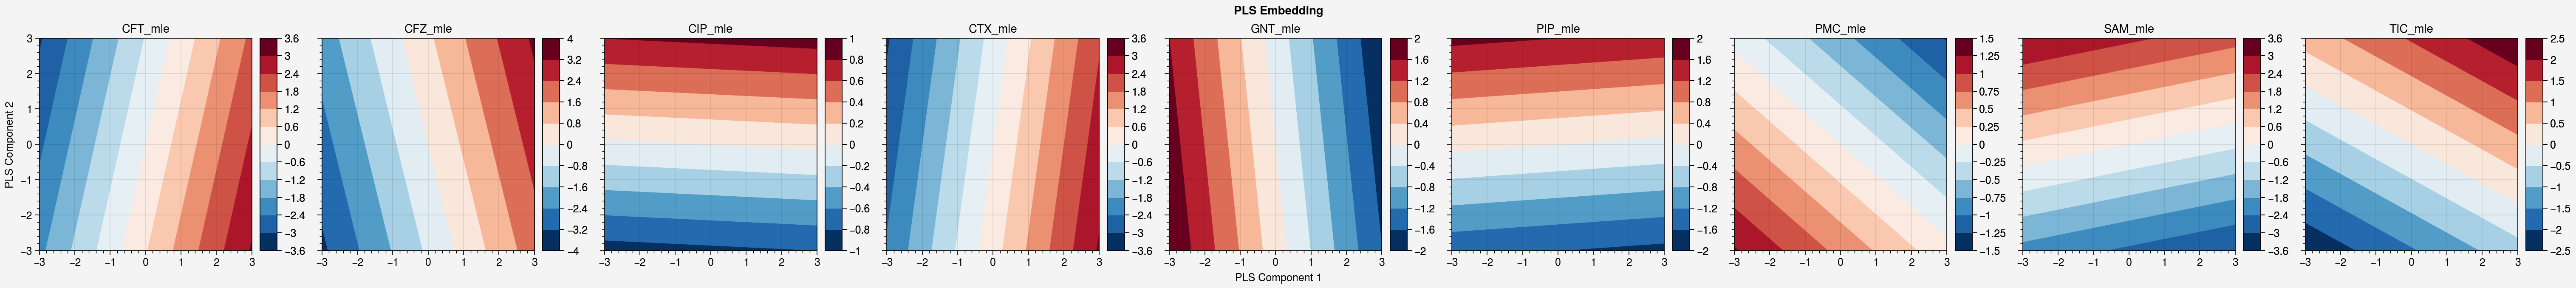

In [44]:
fig, ax = plot.subplots(nrows=1, ncols=9)
for i in range(9):
    ax[0,i].contourf(X, Y, cont_pred[::,::,i], colorbar='r')
    ax[0,i].format(title=drug_ids.loc[i,'id'])
ax.format(xlabel='PLS Component 1', ylabel='PLS Component 2', suptitle='PLS Embedding')
fig.savefig('{}/PLS_Embedding.pdf'.format(in_wd))
#plot.show()

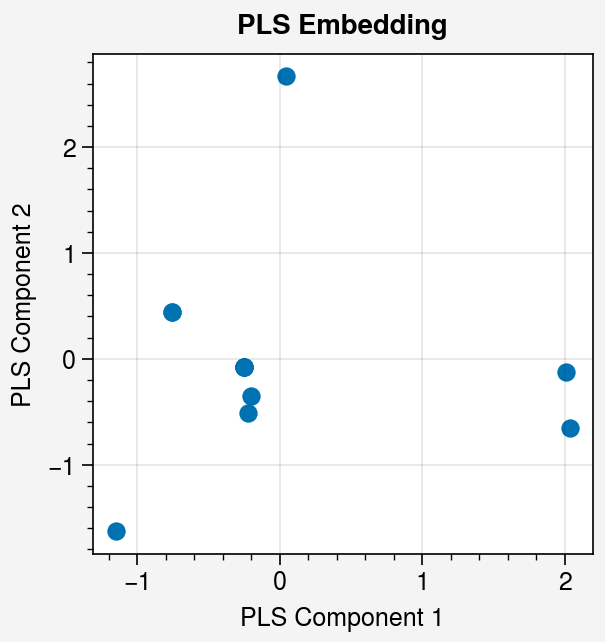

In [8]:
fig, ax = plot.subplots(nrows=1, ncols=1)
ax.scatter(pls_embedd[::,0], pls_embedd[::,1])
ax[0,0].format(xlabel='PLS Component 1', ylabel='PLS Component 2', suptitle='PLS Embedding')
plot.show()
